- Data validation:   
   - week: (int64) Represents the week since product launch. Contains
     no missing values.
   - sales_method: (object) Specifies the sales method used: Email,
     Call, or Email + Call contains no missing values,  to be three sales
     methods  we replaced 'email' to 'Email' and 'em + call' to 'Email +
     Call' .
   - customer_id: (object) Unique identifier for each customer.
     Contains no missing values.
   - nb_sold: (int64) Number of products sold to the customer.
     Contains no missing values.
   - revenue: (float64) Revenue generated from sales, made sure is
     rounded to two decimal places. Contains missing values (1074
     out of 15,000) we removed all columns that have missing values.
   - years_as_customer: (int64) Number of years the customer has
     been buying from the company, Contains no missing values.
     but we have two customers with wrong values 47,63 years since
     company founded in 1984, the maximum years should be 40. I
     removed two customers from datasets since we have enough
     data.
   - nb_site_visits: (int64) Number of times the customer visited the
     website in the last 6 months. Contains no missing values.
   - state: (object) Indicates the shipping location of the customer.
     Contains no missing values.     


- Describe your findings:
  - The histogram of revenue indicates a right-skewed distribution, with the most frequent        revenue values clustering around 50. Additionally, the data shows the presence of      outliers, and The most frequent state is California, while the minimum is Wyoming.
  - In the bar plot, we can see that the most dominant sales method is a combination of Email and Call, which surpasses Email alone. The least dominant method is Call by itself.
  

- Definition of a metric for the business to monitor  
  The Sales Conversion Rate (SCR) This metric allows the business to measure the efficiency of each sales method in converting customer interactions into revenue, SCR-Formula: (Total Revenue Generated by a Sales Method /  Total Customer Interactions) * 100.
  - How should the business use the metric to monitor the business problem
     - Track SCR for each sales method (Email, Call, Email + Call) to identify the most effective approach for generating revenue.
     - Use this to evaluate the efficiency of each method in converting customer interactions    into sales.
     - Focus resources (e.g., training, marketing efforts) on the methods with the highest SCR.
     - Investigate and improve underperforming methods, such as Call, by analyzing its inefficiencies or combining it with more successful approaches.
     - Use the metric as a benchmark for testing new sales strategies and comparing their performance.
     - Adjust resource allocation dynamically based on performance trends in SCR across different methods and regions.

  - Can you estimate initial value(s) for the metric based on the current data
     - Call:
       - Total Revenue = $227,563.49
       - Total Customer Interactions = 4,781
       - SCR_Call = (227,563.49 / 4,781) * 100 = 47.60%
     - Email:
       - Total Revenue = $672,317.83
       - Total Customer Interactions = 6,922
       - SCR_Email = (672,317.83 / 6,922) * 100 = 97.13%
     - Email + Call:
       - Total Revenue = $408,256.69
       - Total Customer Interactions = 2,223
       - SCR_Email+Call = (408,256.69 / 2,223) * 100 =183.65%



-  Final summary including recommendations that the business should undertake
    - Target Sales Strategy:
      - Focus on the most effective sales method ('Email + Call') to maximize conversion rates.
      - Evaluate the training needs and potential improvements in other methods like 'Call'   to enhance their effectiveness.
      - Consider regional differences in sales methods and tailor strategies accordingly, especially targeting high-density states like California.
    - Optimize Marketing and Sales Resources:

      - Based on the conversion rates, allocate marketing and sales resources effectively.         - Increase focus on the most effective methods and reduce efforts on methods that are not performing as well.
      - Experiment with combining sales methods further, such as integrating 'Email + Call' with other digital or in-person strategies to explore additional synergies.

In [ ]:
import numpy as np
import pandas as pd
import warnings
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload the file
uploaded = files.upload()
# Assuming the file you uploaded is 'product.csv'
filename = list(uploaded.keys())[0]  # get the uploaded file name
# Read the uploaded file into a pandas DataFrame
df_raw = pd.read_csv(io.BytesIO(uploaded[filename]))


Saving product_sales.csv to product_sales.csv


# Data validation:

In [ ]:
# Display the first few rows of the DataFrame
df_raw.tail(20)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
14980,3,Call,788bfaaa-56a9-4f7b-82c8-c0f65760ef54,8,41.23,1,24,Texas
14981,6,Call,50608b92-2045-4851-be63-282f956660fa,14,68.93,11,26,California
14982,5,Email + Call,dde667d0-e963-4a2e-a1b7-f2f341a0d245,13,190.23,2,26,Virginia
14983,1,Email + Call,bec6d233-f7ad-401f-9c2e-54fed5ce2937,9,131.39,2,23,Connecticut
14984,4,Email + Call,e599ac4d-4634-49a6-b373-04c021d3a1ab,12,180.71,9,28,South Carolina
14985,3,Email + Call,86756cf2-5ad6-4fc8-8d65-557e4c946174,10,149.12,4,24,Kentucky
14986,3,Call,aaa8e5b8-a334-43a8-a55f-fe6197300e93,9,44.34,3,25,Missouri
14987,1,Email,bb4b9fb0-f704-4da5-bc1c-6c3545860430,10,97.08,5,22,Hawaii
14988,2,Call,b6e0a974-616c-442c-b976-f36f5b3ef757,9,45.01,4,26,California
14989,2,Email,8c9138d0-690b-4709-a279-5e0d4c6429d0,10,104.39,1,31,Arkansas


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [ ]:
df_raw.shape

(15000, 8)

In [ ]:
df_raw.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [ ]:
# function to count missing data and in which feature.
def missing_data(data):
    nb_values = data.isnull().sum().sort_values(ascending = False) #contains the number of values missing
    percent_values = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False) #contains the percentage of values missing
    return pd.concat([nb_values, percent_values], axis=1, keys=['Number of Missing Values', 'Percentage of Missing Values'])

missing_data(df_raw).head(8)

,Number of Missing Values,Percentage of Missing Values
revenue,1074,7.16
week,0,0.00
sales_method,0,0.00
customer_id,0,0.00
nb_sold,0,0.00
years_as_customer,0,0.00
nb_site_visits,0,0.00
state,0,0.00


In [ ]:
df_clened_missValues = df_raw.dropna()

In [ ]:
missing_data(df_clened_missValues).head(5)

,Number of Missing Values,Percentage of Missing Values
week,0,0.0
sales_method,0,0.0
customer_id,0,0.0
nb_sold,0,0.0
revenue,0,0.0


In [ ]:
is_unique = df_raw['customer_id'].is_unique

if is_unique:
    print("The 'customer_id' column is a unique identifier.")
else:
    print("The 'customer_id' column is not a unique identifier.")

The 'customer_id' column is a unique identifier.


In [ ]:
salesmethod_counts = df_raw['sales_method'].value_counts()
print(salesmethod_counts )

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64


In [ ]:
df_raw['sales_method'] = df_raw['sales_method'].replace('email','Email')
df_raw['sales_method'] = df_raw['sales_method'].replace('em + call','Email + Call')


# Exploratory Analysis:

In [ ]:
# Analyze the revenue column to understand its range and detect anomalies
revenue_stats = df_raw['revenue'].describe()

<function matplotlib.pyplot.show(close=None, block=None)>

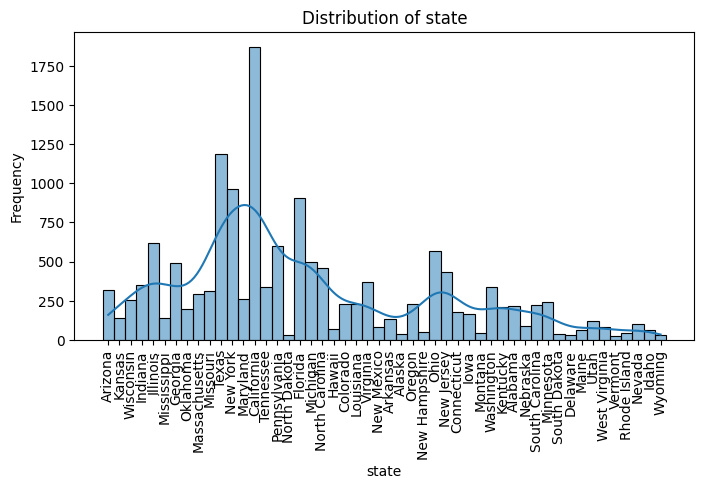

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_raw['state'], bins=30, kde=True)
plt.title('Distribution of state')
plt.xlabel('state')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

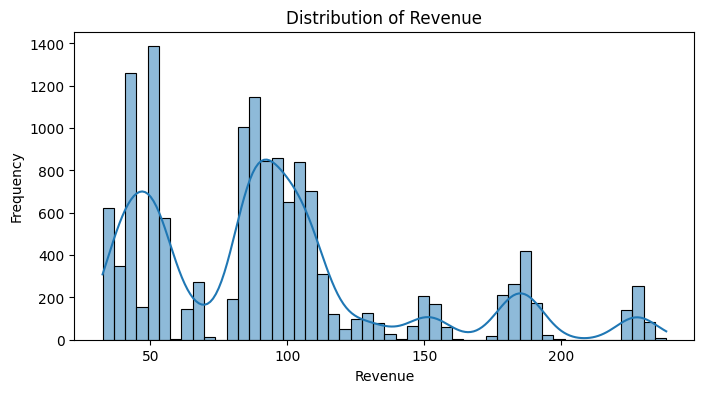

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_raw['revenue'], bins=50, kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show

<Axes: xlabel='sales_method', ylabel='revenue'>

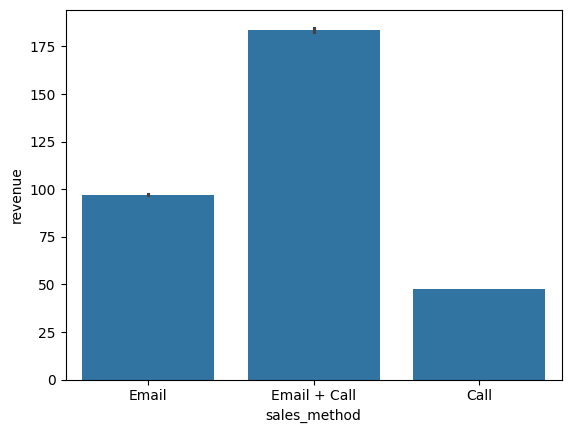

In [ ]:
sns.barplot(y='revenue',x='sales_method',data= df_raw)